In [1]:
import gym
import environment.qmaze

import matplotlib.pyplot as plt
%matplotlib inline

import tensorflow as tf
#tf.enable_eager_execution()

import trfl
import numpy as np
import random

/home/jonas/tensorflow/lib/python3.6/site-packages/tensorflow/python/util/tf_inspect.py:75: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() or inspect.getfullargspec()
  return _inspect.getargspec(target)


/home/jonas/tensorflow/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


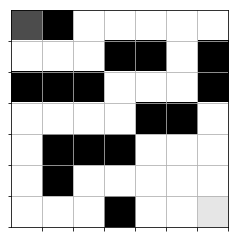

In [2]:
env = gym.make('QMaze-v0', rewards = [1.0, 0.0, 0.0, 0.0]) #rewards = [1.0, -0.75, -0.04,-0.04])
import gym.core
class EWrap(gym.core.ObservationWrapper):
    def observation(self, observation):
        return self.env.state[0] * 7 + self.env.state[1]
    
env = EWrap(env)


env.reset()
env.render()

In [3]:
gamma = 0.95
epsilon = 0.1
lr = 0.2
tep_max = 1000

Q = np.random.rand(49,4)

num_episodes = 1000


def choose_action(state):
    if random.random() < epsilon:
        return random.randrange(4)
    
    return np.argmax(Q[state, :], 0)



for _ in range(num_episodes):
    s = env.reset()
    done = False
    tep = 0
    
    while not done and tep < tep_max:
        a = choose_action(s)
        snew, reward, done, _ = env.step(a)
        
        if done:
            Q[s, a] += lr * (reward - Q[s, a])
            
        else:
            Q[s, a] += lr * (reward + gamma * np.max(Q[snew, :], 0) - Q[s, a])
                             
        s = snew
        tep += 1
        
Qtrue = Q.reshape((7,7,-1))

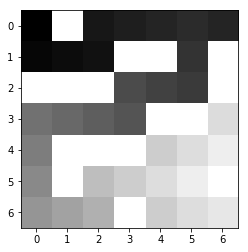

[[1.  0.  1.  1.  1.  1.  0.5]
 [1.  1.  1.  0.  0.  1.  0. ]
 [0.  0.  0.  1.  1.  1.  0. ]
 [1.  1.  1.  1.  0.  0.  1. ]
 [1.  0.  0.  0.  1.  1.  1. ]
 [1.  0.  1.  1.  1.  1.  1. ]
 [1.  1.  1.  0.  1.  1.  1. ]]


In [4]:
# Print value function
V = np.max(Q, 1).reshape((7,7))

# Remove maze
V[env.unwrapped.maze == 0] = 1

img = plt.imshow(V, interpolation='none', cmap='gray')
plt.show()

print(env.unwrapped.maze)

In [5]:
import deepq.baselines as deepq

# tf.reset_default_graph()
env = gym.make('QMaze-v0', rewards = [1.0, -0.75, -0.04,-0.04])
act, policy = deepq.learn(
    env,
    network='mlp',
    lr=1e-3,
    total_timesteps=100000,
    buffer_size=5000,
    gamma = 0.95,
    exploration_fraction=0.1,
    exploration_final_eps=0.01,
    print_freq=10
)

Using TensorFlow backend.


Logging to /tmp/openai-2019-02-18-17-03-02-078917


/home/jonas/tensorflow/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2957: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/jonas/tensorflow/lib/python3.6/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/jonas/tensorflow/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2957: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/jonas/tensorflow/lib/python3.6/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/jonas/tensorflow/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2957: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/jonas/tensorflow/lib/python3.6/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/jonas/tensorflow/lib/python3.6/site-packages/n

/home/jonas/tensorflow/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2957: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/jonas/tensorflow/lib/python3.6/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/jonas/tensorflow/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2957: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/jonas/tensorflow/lib/python3.6/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/jonas/tensorflow/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2957: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/jonas/tensorflow/lib/python3.6/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/jonas/tensorflow/lib/python3.6/site-packages/n

/home/jonas/tensorflow/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2957: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/jonas/tensorflow/lib/python3.6/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/jonas/tensorflow/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2957: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/jonas/tensorflow/lib/python3.6/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/jonas/tensorflow/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2957: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/jonas/tensorflow/lib/python3.6/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/jonas/tensorflow/lib/python3.6/site-packages/n

--------------------------------------
| % time spent exploring  | 84       |
| episodes                | 10       |
| mean 100 episode reward | -6.1     |
| steps                   | 1562     |
--------------------------------------
--------------------------------------
| % time spent exploring  | 63       |
| episodes                | 20       |
| mean 100 episode reward | -7       |
| steps                   | 3730     |
--------------------------------------
--------------------------------------
| % time spent exploring  | 41       |
| episodes                | 30       |
| mean 100 episode reward | -7.3     |
| steps                   | 5867     |
--------------------------------------
--------------------------------------
| % time spent exploring  | 5        |
| episodes                | 40       |
| mean 100 episode reward | -9       |
| steps                   | 9517     |
--------------------------------------
--------------------------------------
| % time spent exploring 

--------------------------------------
| % time spent exploring  | 1        |
| episodes                | 360      |
| mean 100 episode reward | -11      |
| steps                   | 79688    |
--------------------------------------
--------------------------------------
| % time spent exploring  | 1        |
| episodes                | 370      |
| mean 100 episode reward | -11.3    |
| steps                   | 84913    |
--------------------------------------
--------------------------------------
| % time spent exploring  | 1        |
| episodes                | 380      |
| mean 100 episode reward | -12      |
| steps                   | 89874    |
--------------------------------------
--------------------------------------
| % time spent exploring  | 1        |
| episodes                | 390      |
| mean 100 episode reward | -12      |
| steps                   | 94933    |
--------------------------------------
--------------------------------------
| % time spent exploring 

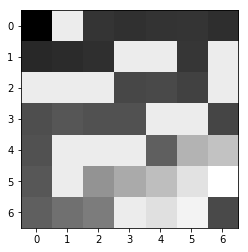

[[-0.46585727  1.         -0.13321282 -0.15649214 -0.14944738 -0.1440282
  -0.17616129]
 [-0.21418095 -0.19621393 -0.17493168  1.          1.         -0.12601914
   1.        ]
 [ 1.          1.          1.         -0.02454958 -0.0122313  -0.0532884
   1.        ]
 [ 0.01777485  0.07245158  0.04450697  0.04046327  1.          1.
  -0.03791343]
 [ 0.04690489  1.          1.          1.          0.12732261  0.65283114
   0.7389078 ]
 [ 0.07302467  1.          0.44653606  0.59034926  0.7138884   0.9361045
   1.1184142 ]
 [ 0.12758106  0.22776411  0.30431226  1.          0.9244694   1.0396737
  -0.00400878]]


In [6]:
env = gym.make('QMaze-v0', rewards = [1.0, 0.0, 0.0, 0.0]) #rewards = [1.0, -0.75, -0.04,-0.04])
Q = np.zeros((7,7,4), dtype = np.float32)
for y in range(7):
    for x in range(7):
        observation = env.reset((x,y,))
        Q[x,y,:] = policy([observation])[0]
            
V = np.max(Q, 2)

# Remove maze
V[env._maze == 0] = 1

img = plt.imshow(V, interpolation='none', cmap='gray')
plt.show()

print(V)

In [7]:
correctness = np.mean(np.argmax(Q, 2) != np.argmax(Qtrue, 2))
print(correctness)

0.5102040816326531
